# CREDIT  CARD APPROVAL ANALYSIS 
Credit card approval is the process by which a credit card issuer evaluates an applicant's creditworthiness and decides whether to grant them a credit card. The approval process involves several key factors such as credit score,income or employment status,debt to income ratio,credit history just a few but to mention.
###### Importing the necessary libraries for analysis

In [143]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [144]:
dataset=pd.read_csv('cc_approvals.csv')
columns_names=['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed',
'PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income','ApprovalStatus']
dataset.columns=columns_names
dataset.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [146]:
print(dataset.dtypes)

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object


In [147]:
dataset.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [148]:
dataset['Ethnicity'].unique()

array(['h', 'v', 'bb', 'ff', 'j', 'z', '?', 'o', 'dd', 'n'], dtype=object)

In [149]:
def feature_encodeing(dataset):
    dataset['Age'] = dataset['Age'].apply(lambda x: 0 if x == '?' else x)
    dataset['Gender'] = dataset['Gender'].map({'a' : 1, 'b' : 2, '?':0})
    dataset['Married'] = dataset['Married'].map({'u' : 1, 'y' : 0,'l': 2,'?': 0})
    dataset['BankCustomer'] = dataset['BankCustomer'].map({'g' : 1, 'p' : 3,'gg': 2,'?':0})
    dataset['EducationLevel'] = dataset['EducationLevel'].map({'q' : 14, 'w' : 1,'m': 2,'r':3,
                                                           'cc':4,'k':5,'c':6,'x':7,'i':8,
                                                           'e':9,'aa':10,'ff':11,'j':12,'d':13,'?': 0})
    dataset['Ethnicity'] = dataset['Ethnicity'].map({'h' : 8, 'v' : 1,'bb': 2,'j':3,
                                                           'z':4,'o':5,'dd':6,'n':7,'ff':9,'?': 0})
    dataset['PriorDefault'] = dataset['PriorDefault'].map({'f' : 0, 't' : 1})
    dataset['Employed'] = dataset['Employed'].map({'f' : 0, 't' : 1})
    dataset['ZipCode'] = dataset['ZipCode'].apply(lambda x: 0 if x == '?' else x)
    dataset['DriversLicense'] = dataset['DriversLicense'].map({'f' : 0, 't' : 1})
    dataset['Citizen'] = dataset['Citizen'].map({'g' : 0, 's' : 1,'p':2})
    dataset['ApprovalStatus'] = dataset['ApprovalStatus'].map({'-' : 0, '+' : 1})
    
    return dataset

In [150]:
feature_encodeing(dataset)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,58.67,4.460,1,1,14,8,3.04,1,1,6,0,0,00043,560,1
1,1,24.50,0.500,1,1,14,8,1.50,1,0,0,0,0,00280,824,1
2,2,27.83,1.540,1,1,1,1,3.75,1,1,5,1,0,00100,3,1
3,2,20.17,5.625,1,1,1,1,1.71,1,0,0,0,1,00120,0,1
4,2,32.08,4.000,1,1,2,1,2.50,1,0,0,1,0,00360,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2,21.08,10.085,0,3,9,8,1.25,0,0,0,0,0,00260,0,0
685,1,22.67,0.750,1,1,6,1,2.00,0,1,2,1,0,00200,394,0
686,1,25.25,13.500,0,3,11,9,2.00,0,1,1,1,0,00200,1,0
687,2,17.92,0.205,1,1,10,1,0.04,0,0,0,0,0,00280,750,0


In [151]:
print(dataset.dtypes)

Gender              int64
Age                object
Debt              float64
Married             int64
BankCustomer        int64
EducationLevel      int64
Ethnicity           int64
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen             int64
ZipCode            object
Income              int64
ApprovalStatus      int64
dtype: object


## feature selection 
 It involves choosing the most relevant and informative features (independent variables) for your model while excluding irrelevant or redundant ones. Feature selection helps improve model performance, reduces overfitting, and simplifies the model.

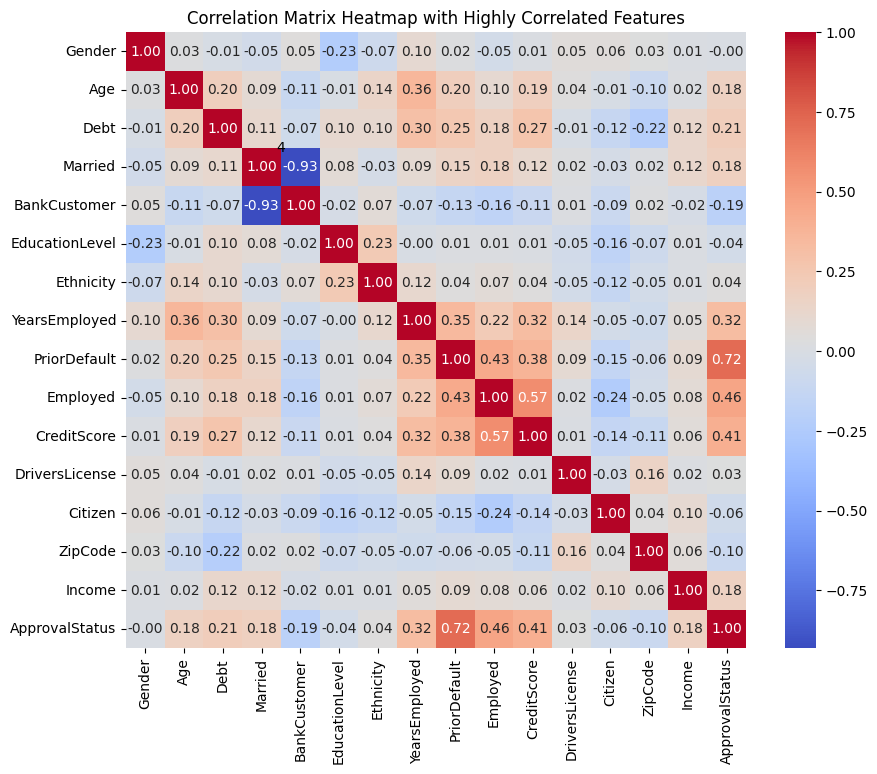

In [152]:
correlation_matrix = dataset.corr()
threshold=0.8
highly_correlated = abs(correlation_matrix) > threshold
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
for i in range(len(highly_correlated.columns)):
    for j in range(i):
        if highly_correlated.iloc[i, j]:
            plt.text(i, j, str(i), va='center', ha='center')
plt.title("Correlation Matrix Heatmap with Highly Correlated Features")
plt.show()
selected_features = [col for col in dataset.columns if col not in correlation_matrix.columns[highly_correlated.sum() > 1]]



In [167]:
from sklearn.preprocessing import StandardScaler
str_x=StandardScaler()
x=str_x.fit_transform(x)


In [168]:
from sklearn.model_selection import train_test_split
x=dataset.drop(columns=['ApprovalStatus'],axis=1)
y=dataset['ApprovalStatus']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.28,random_state=0,shuffle=True)

In [169]:
from sklearn.linear_model import  LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

/home/fibonacci/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [173]:
from sklearn.metrics import classification_report
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       114
           1       0.71      0.80      0.75        79

    accuracy                           0.78       193
   macro avg       0.78      0.78      0.78       193
weighted avg       0.79      0.78      0.78       193



In [176]:
import joblib
model=joblib.dump(model,)